In [2]:
# Time Series Practice!
import pandas as pd

t = pd.Timestamp('4/20/1984 4:20:00')
d = pd.Timedelta('15m')

doneSmokin = t + d

print(doneSmokin)

rng = pd.period_range('6/6/1986 12:15', freq='H', periods=10)
rng

1984-04-20 04:35:00


PeriodIndex(['1986-06-06 12:00', '1986-06-06 13:00', '1986-06-06 14:00',
             '1986-06-06 15:00', '1986-06-06 16:00', '1986-06-06 17:00',
             '1986-06-06 18:00', '1986-06-06 19:00', '1986-06-06 20:00',
             '1986-06-06 21:00'],
            dtype='period[H]', freq='H')

In [1]:
# Stocks!

# Are stocks related to EACH OTHER or INDEPENDENT?
# How is each stock related to its sector (beyond being a member?)
# Should sector value be a feature of each symbol or should each sector be predicted separately?

'''
#weighted moving average
import pandas, numpy
ewma = pandas.stats.moments.ewma
EMOV_n = ewma( ys, com=2 )
#Here, com is a parameter that you can read about here. Then you can combine EMOV_n to Xs, using something like:

Xs = numpy.vstack((Xs,EMOV_n))
#And then you can look at various linear models, here, and do something like:

from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit ( Xs, ys )
print clf.coef_
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa import stattools

indicators = pd.read_csv('Indicators.csv').fillna(0)
indicators['DATE'] = pd.to_datetime(indicators['DATE'])

prices = pd.read_csv('stocks-us-adjClose.csv').fillna(0)
prices['DATE'] = pd.to_datetime(prices['DATE'])
prices = prices.set_index('DATE')
# Note: resample returns resampleObject
month_price_rs = prices.resample('M').mean()

# print(month_price_rs.loc['1/31/1970'])

ed_series = month_price_rs.T.loc['ED']

# ed_series.plot()
# shifted = ed_series.shift(12)
# plt.plot(shifted)
# rol = ed_series.rolling(window = 15)
# # agg apply count max min median name quantile kurt aggregate std skew sum var
# rol.mean().plot()
# rol.std().plot()


# Autoregressive / Differencing / Moving Average
# ARIMA model...
# Make / Test for Stationarity...
# Autocorrelation function versus Partial Autocorrelation

/Users/crazyfox/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


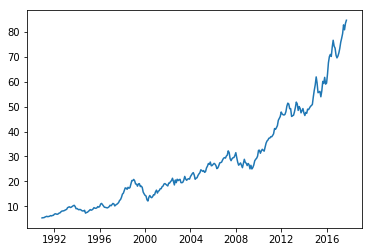

In [2]:
ed_series = ed_series[250:]
plt.plot(ed_series)

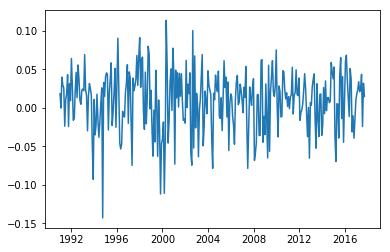

In [3]:
ed_series.dropna(inplace=True)
log = np.log(ed_series)
difflog = log - log.shift()
plt.plot(difflog)

In [5]:
# Remove first value of difflog nparray
difflog = difflog[1:]

In [6]:
#AD Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller

useful_values_raw = adfuller(difflog, autolag='AIC', regression='c')[:5]
useful_values = [v for v in useful_values_raw[:4]]
# test statistic, p-value, #lags used, #observations
print(useful_values)

[-15.5405930949848, 2.161874782860482e-28, 0, 321]


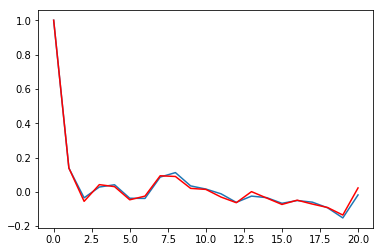

In [9]:
# pacf / acf
from statsmodels.tsa.stattools import pacf, acf

acf_result = acf(difflog.values, nlags=20)
pacf_result = pacf(difflog.values, nlags=20)

plt.plot(acf_result)
plt.plot(pacf_result, color='red')

/Users/crazyfox/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/crazyfox/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/crazyfox/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


1.6587919143103893e-06


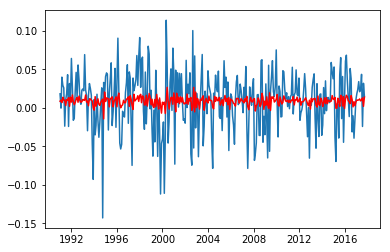

In [18]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(log, order=(2,1,0))
results_ar = model.fit(disp=-1)
plt.plot(difflog)
plt.plot(results_ar.fittedvalues, color='red')
#Squared error
print(sum(results_ar.fittedvalues-difflog)**2)